In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 16
IMAGE_SIZE = 96
CHANNELS = 3
EPOCHS = 5

In [3]:
df = tf.keras.preprocessing.image_dataset_from_directory(
    r"D:\PlantVillage",
    seed = 123,
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 16011 files belonging to 10 classes.


In [4]:
CLASS_NAMES = df.class_names

In [5]:
for image_batch , labels_batch in df.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(16, 96, 96, 3)
[7 2 4 6 5 7 6 5 6 7 4 7 1 1 2 1]


In [6]:
# plt.figure(figsize=(10,10))
# for image_batch , labels_batch in df.take(1):
#     for i in range(12):
#         ax = plt.subplot(3,4,i + 1)
#         plt.imshow(image_batch[i].numpy().astype("uint8"))
#         plt.title(class_names[labels_batch[i]])
#         plt.axis("off")
#         plt.tight_layout()
#         plt.show()

In [7]:
dataset_size = df.cardinality().numpy()
train_size = int(0.8 * dataset_size)
val_size   = int(0.1 * dataset_size)

train_ds = df.take(train_size)
val_ds   = df.skip(train_size).take(val_size)
test_ds  = df.skip(train_size + val_size)

In [8]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

800
100
101


In [9]:
def preprocess(x, y):
    x = tf.cast(x, tf.float32) / 255.0
    return x, y

train_ds = train_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
val_ds   = val_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
test_ds  = test_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)

train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds   = val_ds.prefetch(tf.data.AUTOTUNE)
test_ds  = test_ds.prefetch(tf.data.AUTOTUNE)

In [10]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])

In [11]:
INPUT_SHAPE = (IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = len(CLASS_NAMES)

model = tf.keras.Sequential([
    layers.Input(shape=INPUT_SHAPE),
    data_augmentation,

    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax"),
])

In [12]:
# INPUT_SHAPE = (IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
# n_classes = 3

# model = models.Sequential([
#     layers.Conv2D(32, kernel_size = (3,3), activation="relu",input_shape=INPUT_SHAPE),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64, kernel_size = (3,3), activation="relu"),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64, kernel_size = (3,3), activation="relu"),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64, (3,3),activation="relu"),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64, (3,3),activation="relu"),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64,(3,3), activation="relu"),
#     layers.MaxPooling2D((2,2)),
#     layers.Flatten(),
#     layers.Dense(64, activation = "relu"),
#     layers.Dense(n_classes, activation="softmax"),
# ])

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 94, 94, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 47, 47, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 20, 20, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         409,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 466,634 (1.78 MB)

 Trainable params: 466,634 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [15]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

Epoch 1/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 92s 113ms/step - accuracy: 0.5409 - loss: 1.3208 - val_accuracy: 0.7206 - val_loss: 0.8156
Epoch 2/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 90s 112ms/step - accuracy: 0.7716 - loss: 0.6654 - val_accuracy: 0.8469 - val_loss: 0.4512
Epoch 3/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 104s 130ms/step - accuracy: 0.8270 - loss: 0.4985 - val_accuracy: 0.8250 - val_loss: 0.4889
Epoch 4/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 96s 120ms/step - accuracy: 0.8626 - loss: 0.3935 - val_accuracy: 0.8888 - val_loss: 0.3442
Epoch 5/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 89s 112ms/step - accuracy: 0.8830 - loss: 0.3394 - val_accuracy: 0.8963 - val_loss: 0.2824


In [16]:
scores = model.evaluate(test_ds)

101/101 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - accuracy: 0.8814 - loss: 0.3285


In [17]:
history.params

{'verbose': 'auto', 'epochs': 5, 'steps': 800}

In [18]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [19]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

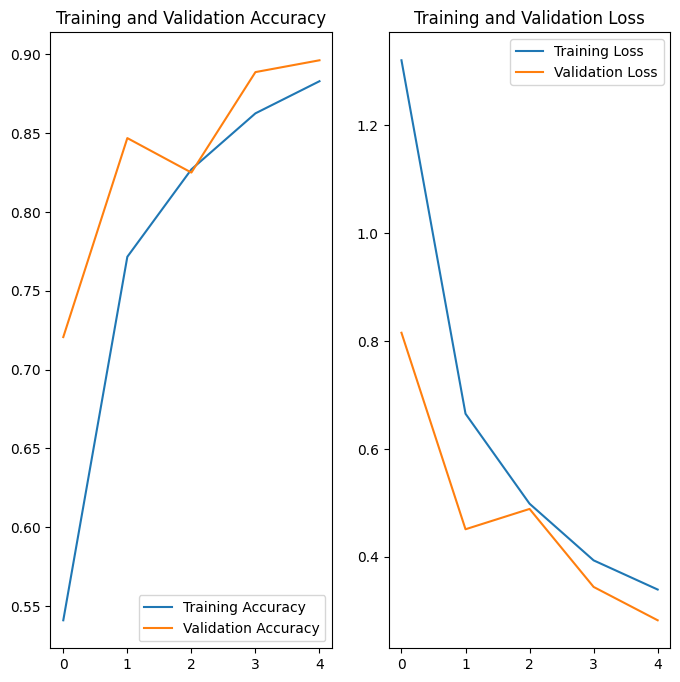

In [20]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict:
actual label: Tomato_Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
predicted label: Tomato_Early_blight


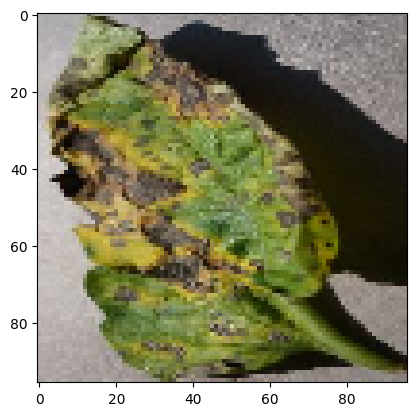

In [31]:
for image_batch, label_batch in test_ds.take(1):
    
    first_image = image_batch[1].numpy()
    first_label = label_batch[1].numpy()

    print("first image to predict:")
    plt.imshow(first_image)
    print("actual label:",CLASS_NAMES[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:",CLASS_NAMES[np.argmax(batch_prediction[1])])

In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = CLASS_NAMES[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


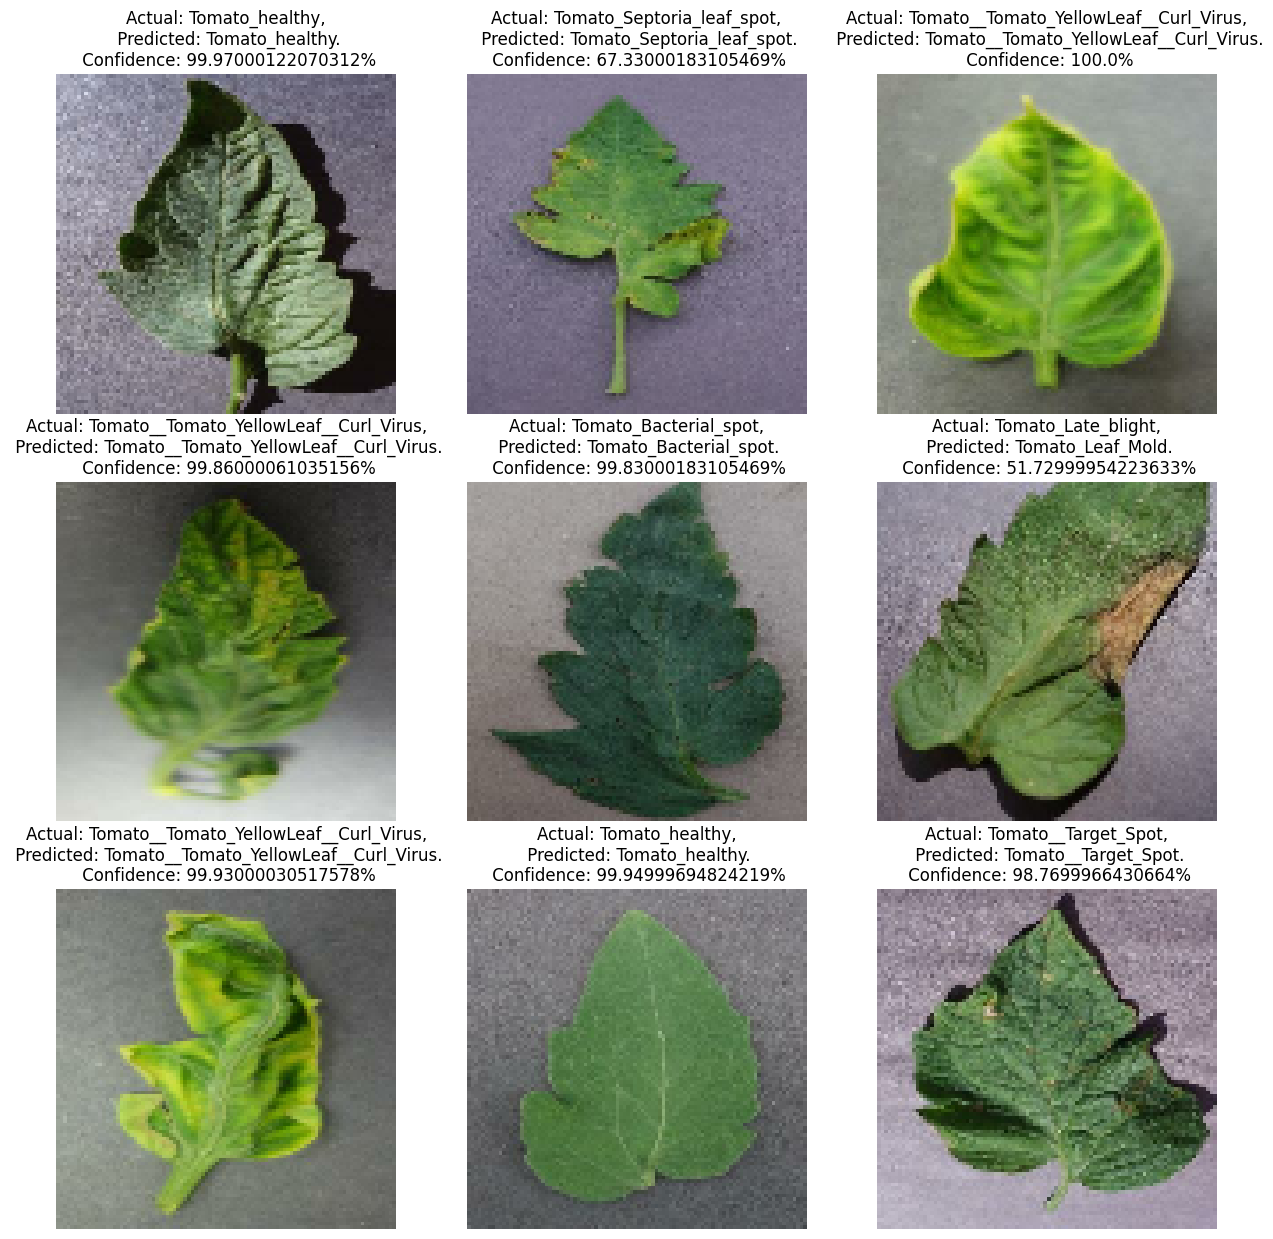

In [33]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = CLASS_NAMES[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [35]:
model.save(r"D:\models\version_1.keras")

In [36]:
#model = tf.keras.models.load_model(r"D:\models\version_1.keras")